In [33]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
import requests
#nltk.download('punkt')
#nltk.download('stopwords')

In [34]:
page = requests.get('http://w2.vatican.va/content/francesco/es/encyclicals/documents/papa-francesco_20150524_enciclica-laudato-si.html')

In [35]:
soup = BeautifulSoup(page.text, 'html.parser')

In [36]:
texto_parrafos = [i.text for i in soup.find_all('p')]
texto_parrafos = texto_parrafos[3:]
texto_parrafos = texto_parrafos[0:-189]
texto_string = ''.join(texto_parrafos)

In [37]:
reg = r'[a-zA-Zñáéíóú]+'
reg_parenthesis = 'r(\([\w\sñáéíóú\:\-\n]+\))'
reg_citas = r'[«][\w\s\,áéíóú]+[»]'

In [38]:
lista_citas = re.findall(reg_citas,texto_string)
lista_citas = [i.replace('«','') for i in lista_citas]
lista_citas = [i.replace('»','') for i in lista_citas]

In [39]:
tokenized_text = sent_tokenize(texto_string)

In [40]:
tokenized_word = word_tokenize(texto_string)

In [41]:
stop_words = set(stopwords.words("spanish"))

In [42]:
filtered_x = []
for i in tokenized_text:
    lista_palabras = i.split(' ')
    for j in lista_palabras:
        if j not in stop_words:
            filtered_x.append(j)
        texto_no_stop = ' '.join(filtered_x)

In [43]:
punt_list = [',','.','«','»','[',']',':','(',')']

In [44]:
word_tokenize = word_tokenize(texto_no_stop)

In [45]:
tokenized_text = sent_tokenize(texto_no_stop)
tokenized_word = [i for i in word_tokenize if i not in punt_list]

In [46]:
fdist = FreqDist(tokenized_word)

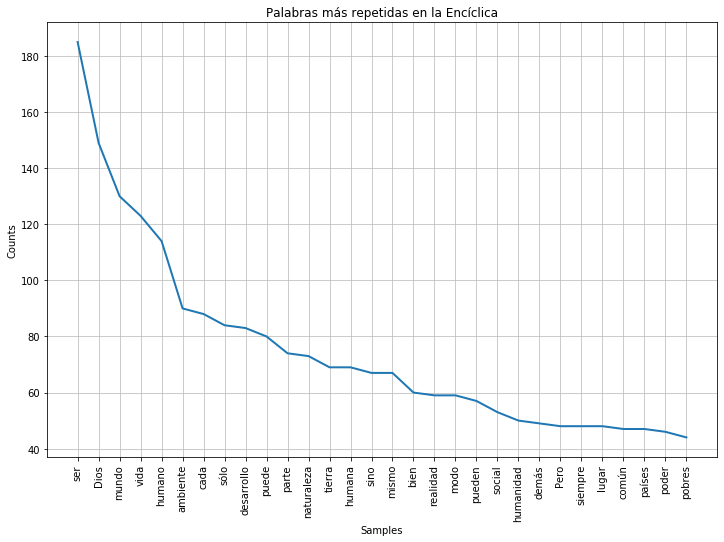

In [47]:
plt.figure(figsize = (12,8))
plt.title('Palabras más repetidas en la Encíclica')
fdist.plot(30,cumulative = False)
plt.show()

In [48]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords

In [49]:
print('Summary:')
print(summarize(texto_no_stop, ratio = 0.01))

Summary:
Ocho años después   Pacem in terris, 1971, beato Papa Pablo VI refirió problemática ecológica, presentándola crisis, « consecuencia dramática » actividad descontrolada ser humano: « Debido explotación inconsiderada naturaleza, [el ser humano] corre riesgo destruirla ser vez víctima degradación »[2].También habló FAO posibilidad «catástrofe ecológica bajo efecto explosión civilización industrial», subrayando «urgencia necesidad cambio radical comportamiento humanidad», «los progresos científicos extraordinarios, proezas técnicas sorprendentes, crecimiento económico prodigioso, van acompañados auténtico progreso social moral, vuelven definitiva hombre»[3].5.
destrucción ambiente humano serio, Dios sólo encomendó mundo ser humano, sino propia vida don debe ser protegido diversas formas degradación.
Toda pretensión cuidar mejorar mundo supone cambios profundos «los estilos vida, modelos producción consumo, estructuras consolidadas poder rigen hoy sociedad»[7].El auténtico desarrol

In [52]:
print('Keywords:')
print(keywords(texto_no_stop, ratio=0.01))

Keywords:
dios
dio
ser
mundo
mundos
vida
vidas
ambiental
ambiente
ambientes
solo
solos
tierra
tierras
humano
humanos
partes
lugar
lugares
sino
desarrollo
desarrollos
social
sociales
toda
todas
naturaleza
puede
cada persona
relaciones
relacion
personas
cosas parte
asis
asi
modo
modos
mismos
realidad
realidades
bienes
bien
pueden
siempre
humana
humanas
pero mismo
que
formas
forma
problemas
problema
poder
poderes
pobres
pobre
humanidad
recursos
recurso
cosa
los
criaturas
criatura
especial
especies
especie
estos
esto
todos
todo
creacion
agua
aguas
politica
politicas
cambio
cambios
maneras
manera
paises
planeta
propio
propios
nueva
nuevas
